<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_3_globalTemp/Visualizing_Time_Series_Dataset_Global_Temp_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

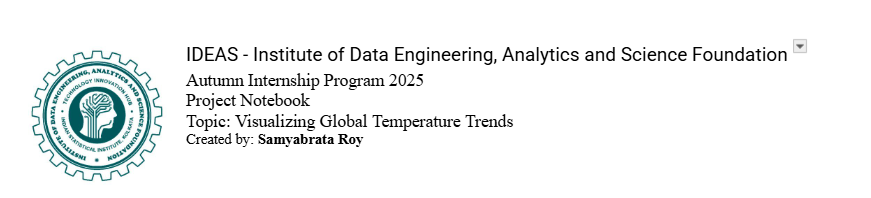

# Notebook: 3

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---




---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

#Introduction



## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [18]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)


    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory

##Task:

What if the dataset was not available in any only repo or not hosted anywhere? How can you upload a dataset from your local machine? Code it

Upload directly from your local machine

In [19]:
import pandas as pd
from google.colab import files

# Upload file from local system
uploaded = files.upload()

# uploaded is a dictionary with filenames as keys
for fn in uploaded.keys():
    print(f"Uploaded file: {fn}")
    df = pd.read_csv(fn)  # Read uploaded CSV
    print(df.head())


Saving monthly_csv.csv to monthly_csv.csv
Uploaded file: monthly_csv.csv
    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292




---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly avg temparature obtaining from 2 different sources, which will help helps us understand trends across the years.  
Are there peaks during certain months (like due to any particular season)? Let’s find out.

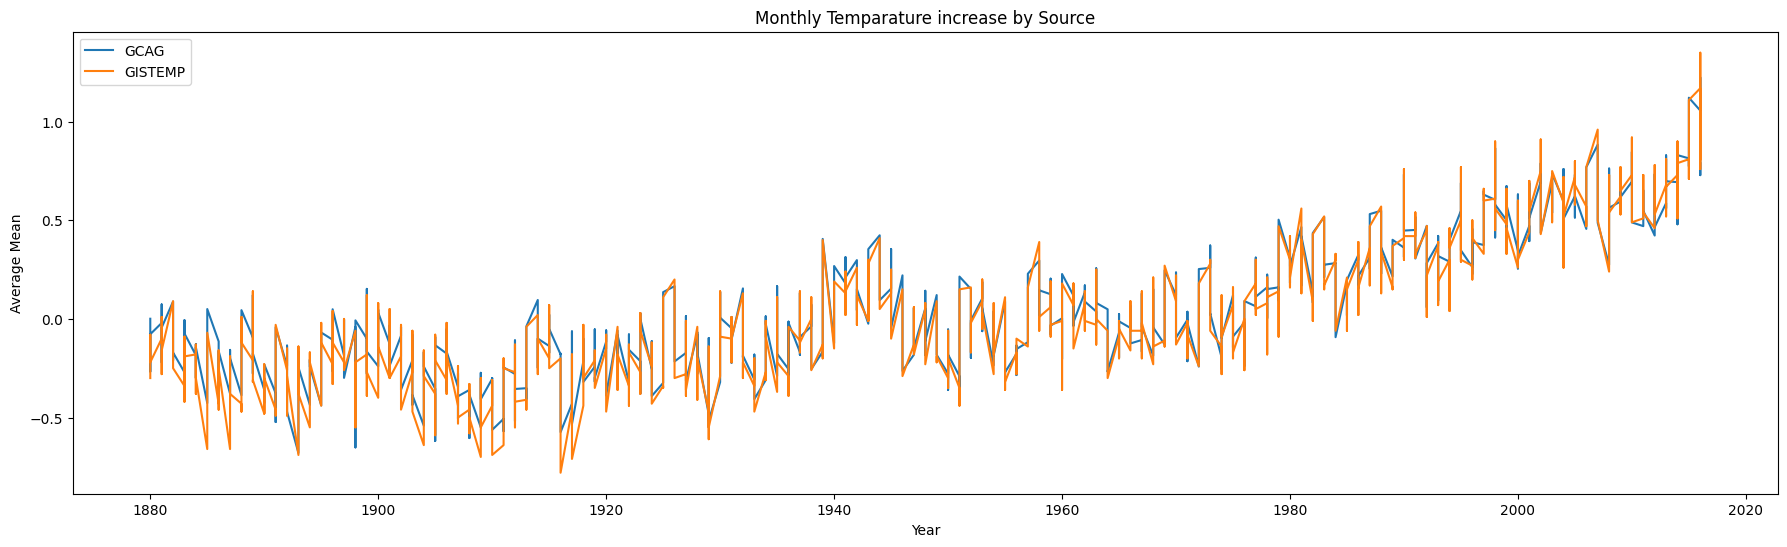

In [20]:
import matplotlib.pyplot as plt

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Extract Year from Date
df_temp['Year'] = df_temp['Date'].dt.year   # 👈 added line

# Plot line chart
plt.figure(figsize=(22,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Year'], subset['Mean'], label=source)

plt.title("Monthly Temparature increase by Source")
plt.xlabel("Year")
plt.ylabel("Average Mean")
plt.legend()
plt.grid(True, linestyle="--", alpha=0)
plt.show()





---



### Plot 2:

12 Months Moving Average

Smoothing out seasonal fluctuations and short-term variations to reveal the underlying long-term temperature trends. The 12-month moving average provides a clearer view of climate patterns by averaging each month with the 11 months surrounding it, making it easier to identify gradual warming or cooling trends over the years.

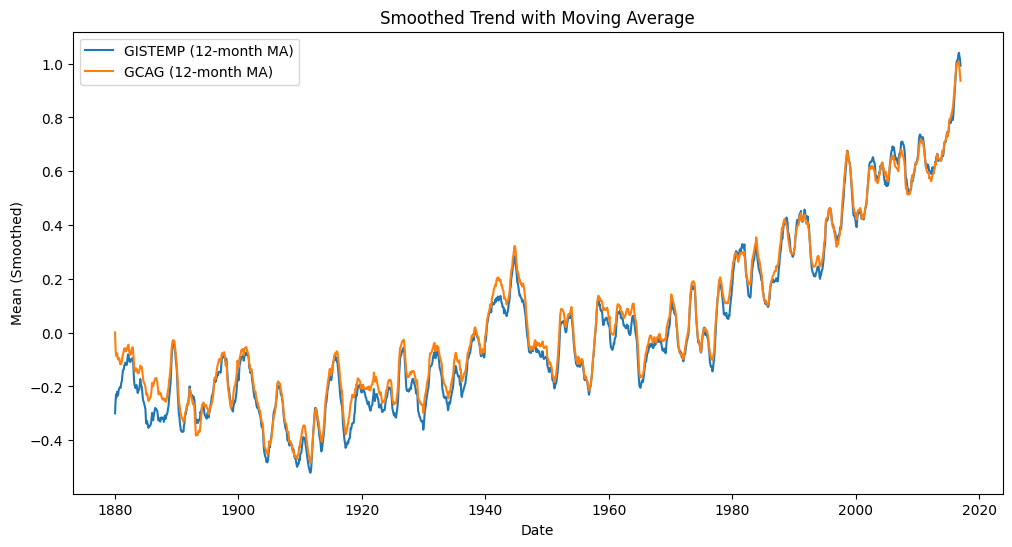

In [21]:
# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Calculate moving average (e.g., 12-month window)
df_temp['Moving_Avg'] = df_temp.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plot moving average
plt.figure(figsize=(12,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Date'], subset['Moving_Avg'], label=f"{source} (12-month MA)")

plt.title("Smoothed Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.show()


Q. How would you interpet this?

Construct another line plot by taking any one of the souces in count and try to smooth-out the variation more and try to come up with a trend

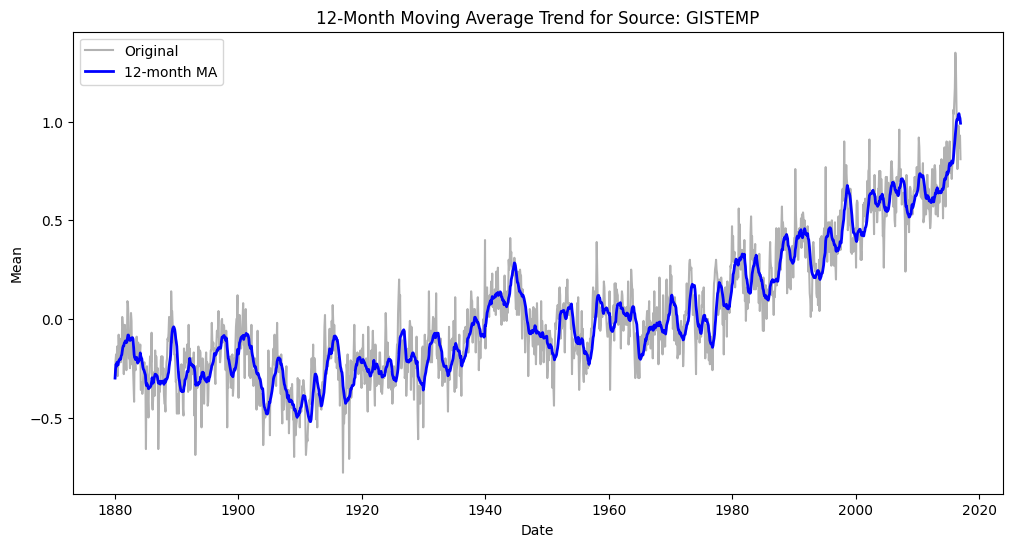

In [22]:
# Pick one source
selected_source = df_temp['Source'].unique()[0]
subset = df_temp[df_temp['Source'] == selected_source].copy()  # make a copy

# Apply 12-month moving average
subset['Moving_Avg_12'] = subset['Mean'].rolling(window=12, min_periods=1).mean()

# Plot original vs 12-month MA
plt.figure(figsize=(12,6))
plt.plot(subset['Date'], subset['Mean'], color='gray', alpha=0.6, label="Original")
plt.plot(subset['Date'], subset['Moving_Avg_12'], color='blue', linewidth=2, label="12-month MA")

plt.title(f"12-Month Moving Average Trend for Source: {selected_source}")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.legend()
plt.show()






---


### Plot 3

Seasonal Temperature Heatmap (Last 50 Years)

A comprehensive heatmap displaying temperature variations across months and years over the past five decades. This visualization reveals seasonal patterns, climate shifts, and anomalies by showing how temperatures have changed month-by-month across different years. Warmer periods appear as lighter/warmer colors while cooler periods show as darker/cooler colors, making it easy to spot seasonal consistency, unusual weather events, and long-term climate trends.

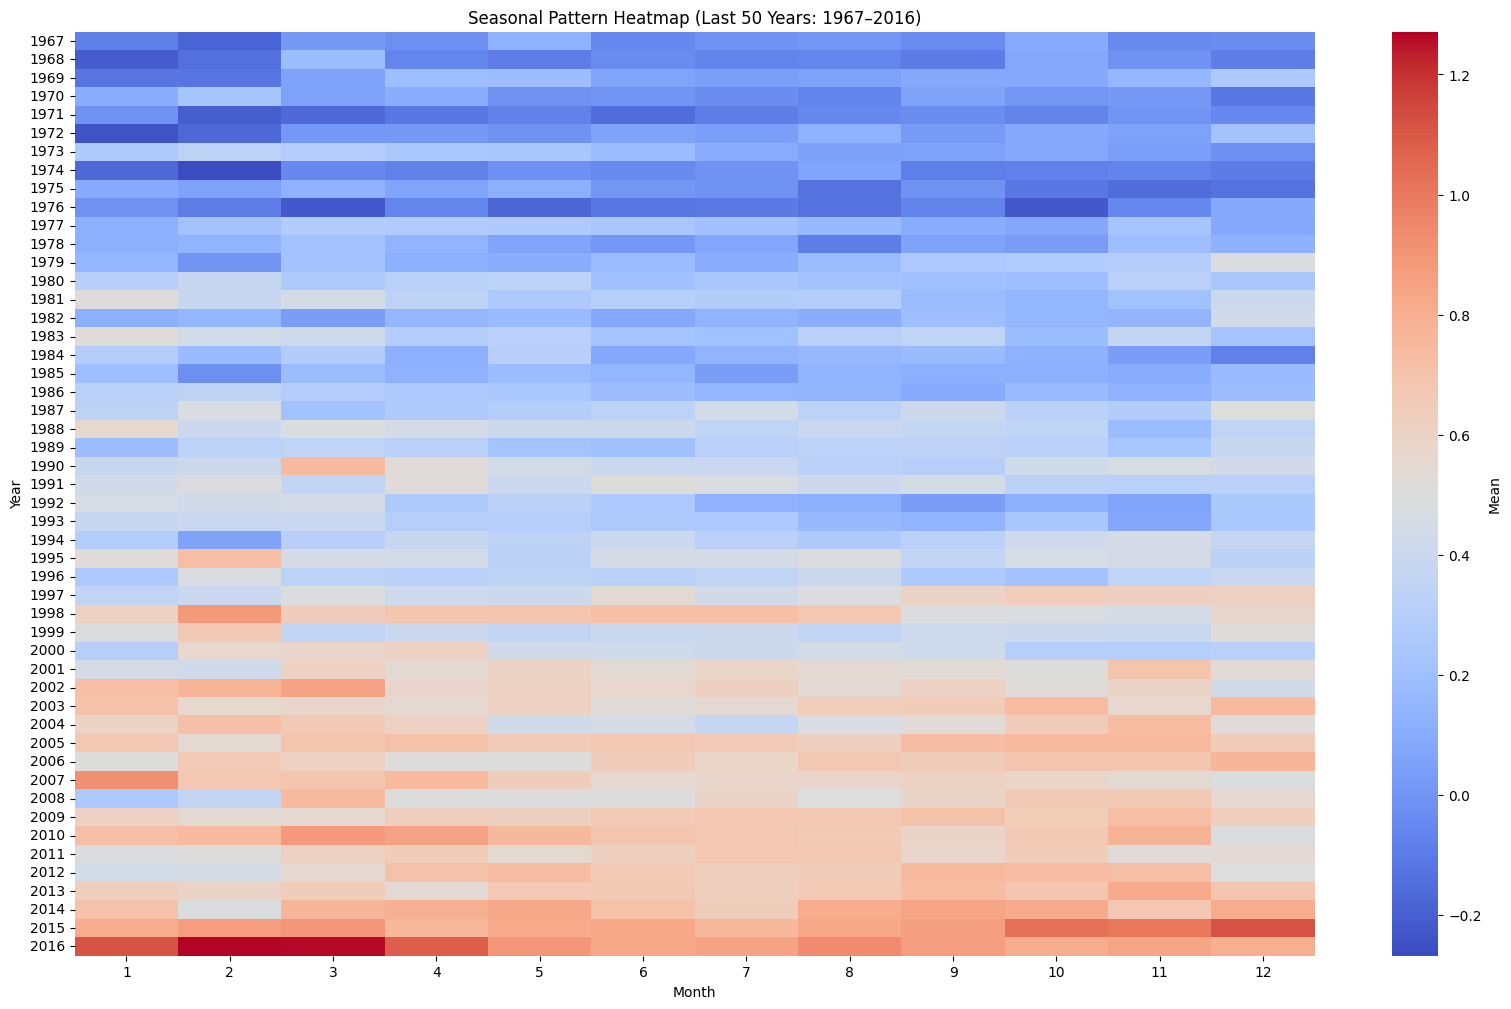

In [23]:
# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 50 years
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

# Group by Year and Month (average across sources if needed)
seasonal_data = df_last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


Q. How about we try to visualize last 20 years rather? Construct the plot

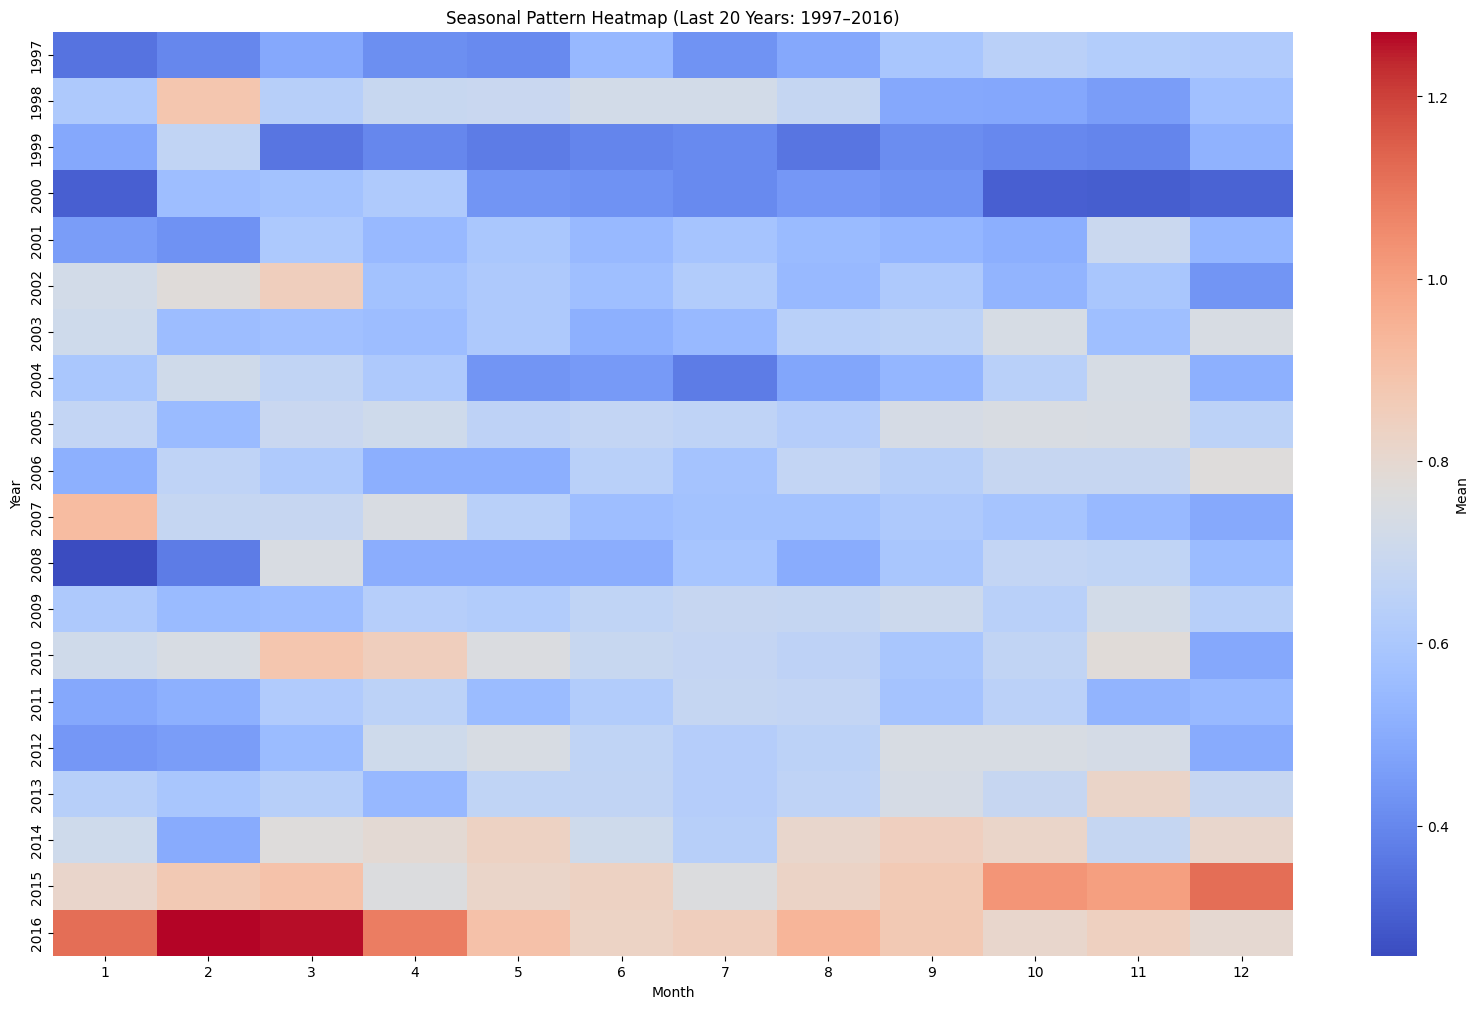

In [24]:
# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 20 years
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]

# Group by Year and Month (average across sources if needed)
seasonal_data_20 = df_last20.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data_20 = seasonal_data_20.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data_20, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 20 Years: {latest_year-19}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()




---

Task:

What type of charts could have served the same purpose done in plot 3? Plot any one of them (apart from heatmap) and visualize seasonal variation

/tmp/ipython-input-757249638.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', 12)


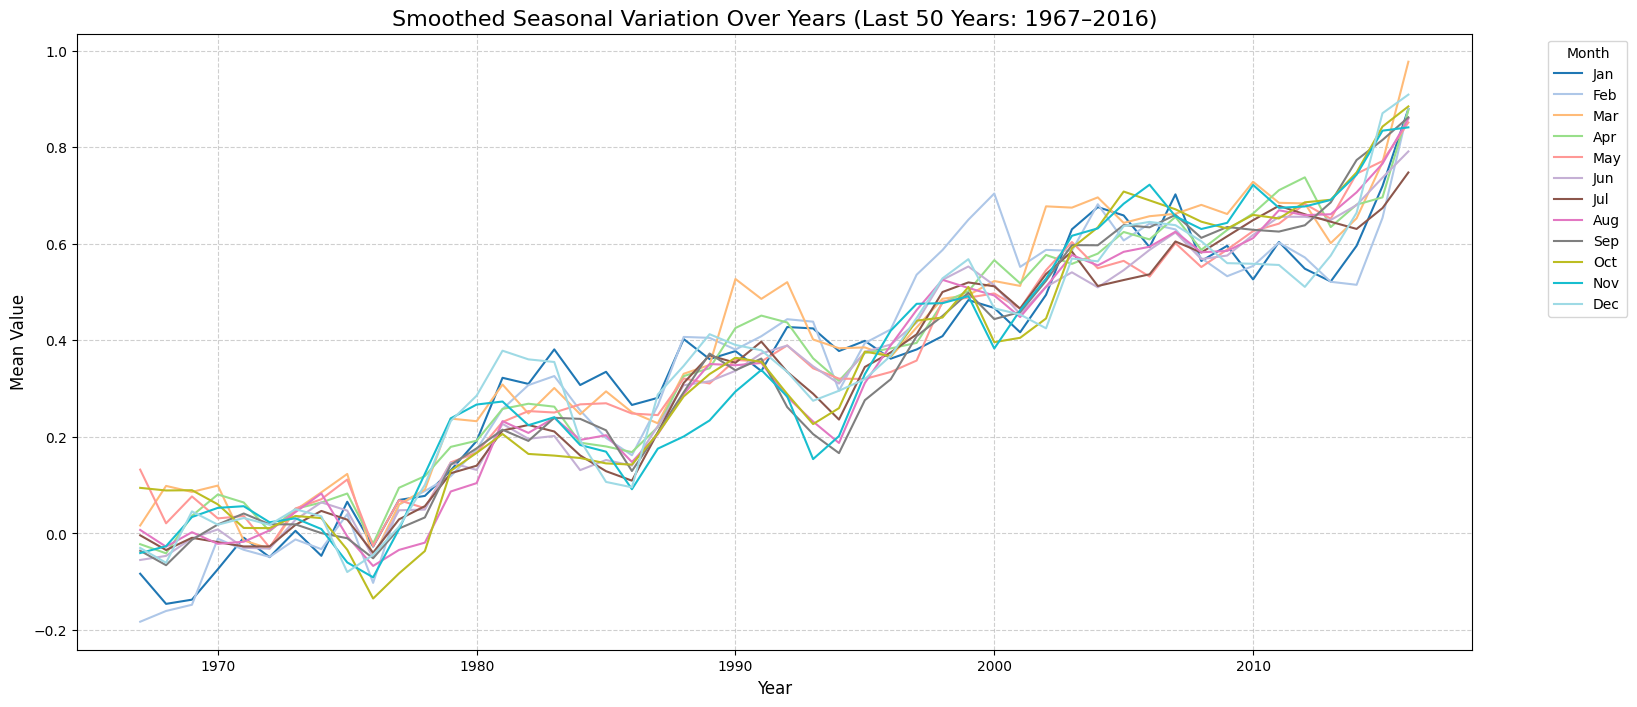

In [25]:
import matplotlib.pyplot as plt
import calendar
import matplotlib.cm as cm
import numpy as np

# Pivot data for line plot (Year x Month)
line_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Apply rolling mean (window=3 years for smoothing)
line_data_smooth = line_data.rolling(window=3, min_periods=1).mean()

# Define colors for 12 months
colors = cm.get_cmap('tab20', 12)

# Plot
plt.figure(figsize=(18,8))
for month in range(1, 13):
    plt.plot(line_data_smooth.index,
             line_data_smooth[month],
             marker='',
             label=calendar.month_abbr[month],
             color=colors(month-1))

plt.title(f"Smoothed Seasonal Variation Over Years (Last 50 Years: {latest_year-49}–{latest_year})", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()




---



### Assignment:

Find a similar dataset from any public repository or constrt a synthetic data from `www.syngendata.ai` and perform similart analysis to draw inference

In [26]:
# Import the data from my local machine
import pandas as pd
from google.colab import files

# Upload file from local system
uploaded = files.upload()

# uploaded is a dictionary with filenames as keys
for fn in uploaded.keys():
    print(f"Uploaded file: {fn}")
    df = pd.read_csv(fn)  # Read uploaded CSV
    print(df.head())


Saving compressed_data.csv.gz to compressed_data.csv (3).gz
Uploaded file: compressed_data.csv (3).gz
         Date Land Class Land Category     State    County  FIPS Code  \
0  01/01/2003    Federal       Onshore  Colorado  Huerfano     8055.0   
1  01/01/2003    Federal       Onshore  Colorado  Huerfano     8055.0   
2  01/01/2003    Federal      Offshore       NaN       NaN        NaN   
3  01/01/2003    Federal      Offshore       NaN       NaN        NaN   
4  01/01/2003    Federal      Offshore       NaN       NaN        NaN   

   Offshore Region    Revenue Type Mineral Lease Type  \
0              NaN       Royalties          Oil & Gas   
1              NaN           Rents          Oil & Gas   
2  Gulf of America       Royalties          Oil & Gas   
3  Gulf of America  Other revenues          Oil & Gas   
4  Gulf of America       Royalties          Oil & Gas   

                    Commodity                      Product    Revenue  
0              Carbon dioxide     Carbon Dio

Plot 4: USA National Revenue by Sector (2010–2024)

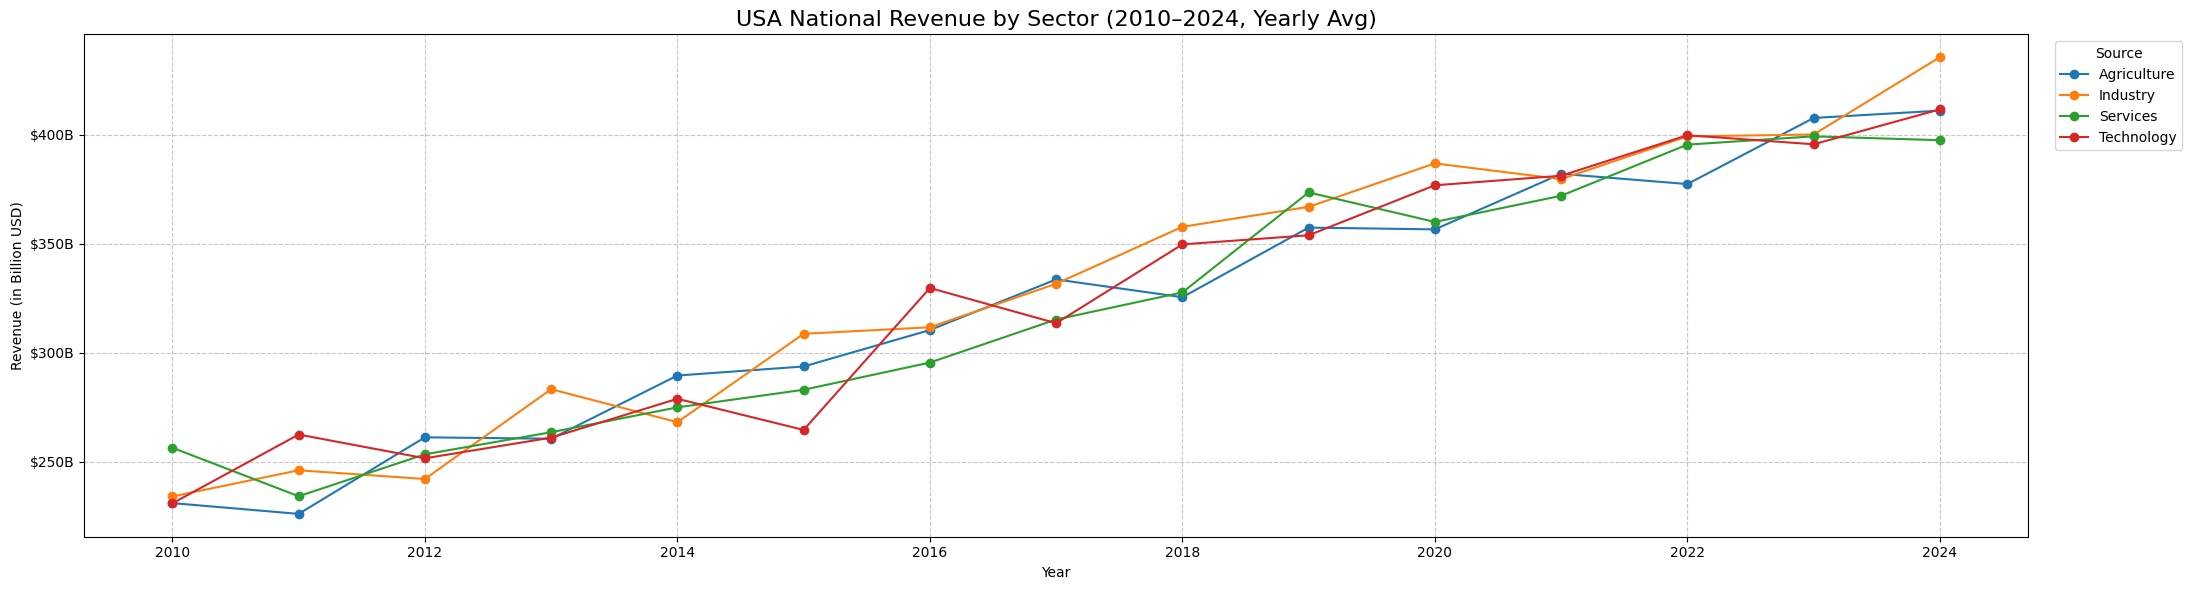

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Aggregate & sort
df_yearly = df_revenue.copy()
df_yearly['Year'] = df_yearly['Date'].dt.year
df_yearly = (
    df_yearly.groupby(['Year', 'Source'])['Revenue']
    .mean()
    .reset_index()
    .sort_values(by=['Year', 'Source'])
)

# Plot
plt.figure(figsize=(22,6))
for source in df_yearly['Source'].unique():
    subset = df_yearly[df_yearly['Source'] == source]
    plt.plot(subset['Year'], subset['Revenue'], marker='o', linestyle='-', label=source)

plt.title("USA National Revenue by Sector (2010–2024, Yearly Avg)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Revenue (in Billion USD)")
plt.legend(title="Source", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)

# Format Y-axis as billions
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}B'))

plt.tight_layout()
plt.show()



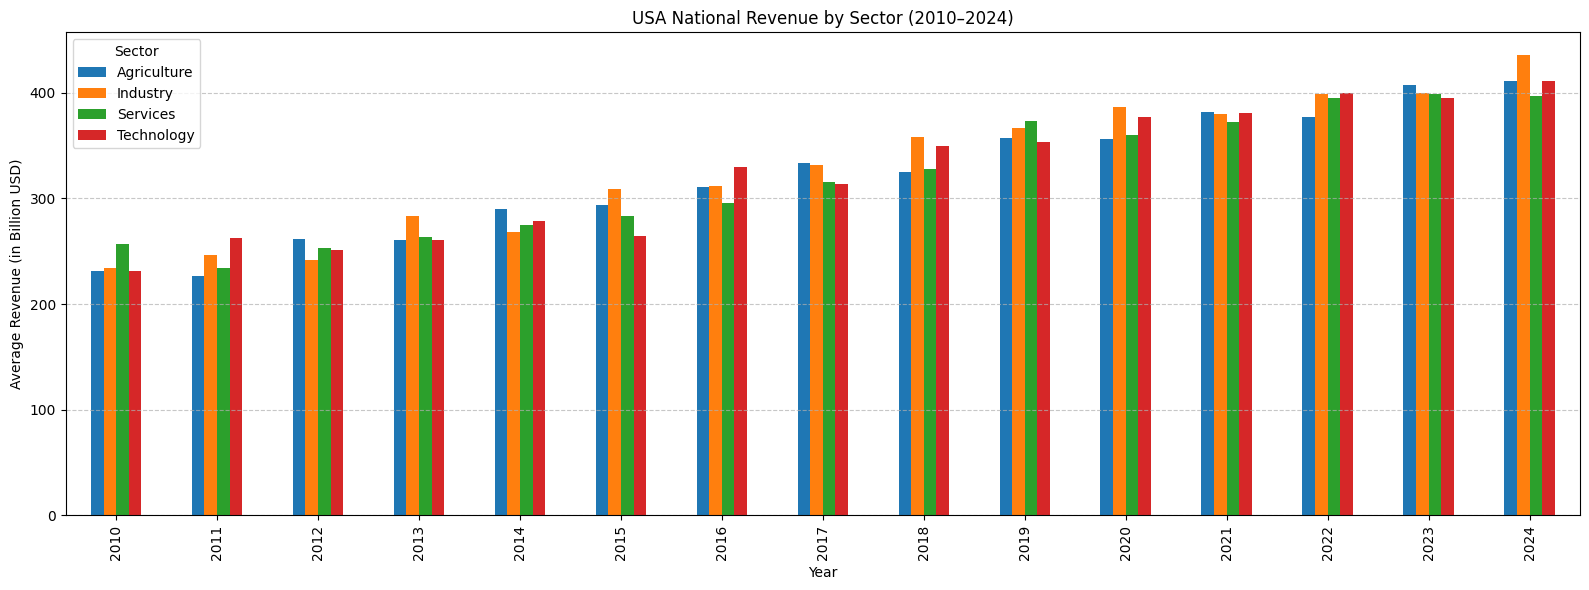

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic USA revenue dataset (2010–2024, monthly)
date_range = pd.date_range(start="2010-01-01", end="2024-12-01", freq="MS")
sources = ["Agriculture", "Industry", "Services", "Technology"]

data = []
np.random.seed(42)  # reproducibility
for source in sources:
    revenue = np.random.uniform(50, 200, len(date_range))  # random revenue
    trend = np.linspace(100, 300, len(date_range))         # upward trend
    noise = np.random.normal(0, 10, len(date_range))       # random noise
    total = revenue + trend + noise
    for date, val in zip(date_range, total):
        data.append([date, source, val])

# Create DataFrame
df_revenue = pd.DataFrame(data, columns=["Date", "Source", "Revenue"])

# Group by Year and Sector (average revenue per year)
df_revenue['Year'] = df_revenue['Date'].dt.year
yearly_revenue = df_revenue.groupby(['Year', 'Source'])['Revenue'].mean().reset_index()

# Pivot for bar plot
pivot_data = yearly_revenue.pivot(index='Year', columns='Source', values='Revenue')

# Plot grouped bar chart
pivot_data.plot(kind='bar', figsize=(16,6))

plt.title("USA National Revenue by Sector (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Average Revenue (in Billion USD)")
plt.legend(title="Sector")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()




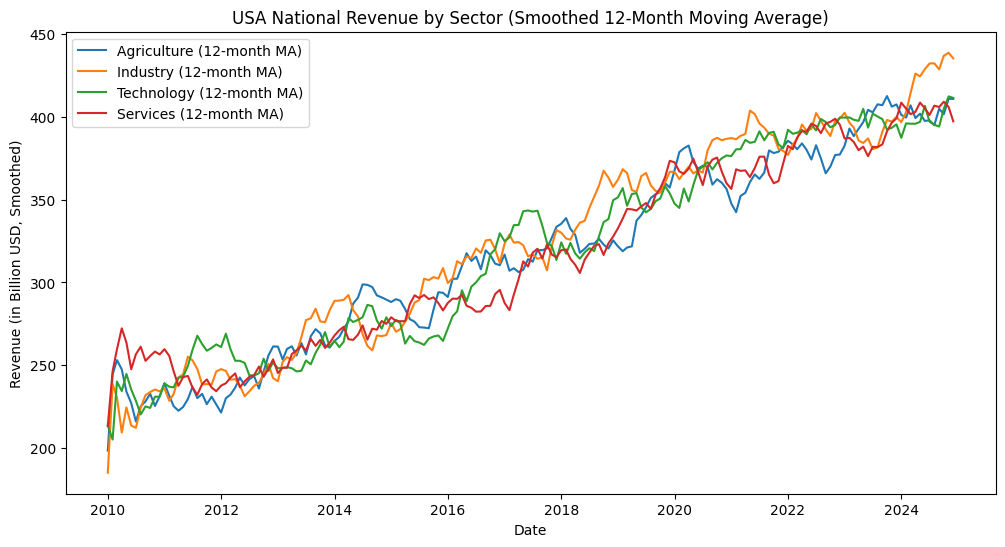

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Generate synthetic USA revenue dataset (if not already defined) ---
date_range = pd.date_range(start="2010-01-01", end="2024-12-01", freq="MS")
sources = ["Agriculture", "Industry", "Services", "Technology"]

data = []
np.random.seed(42)
for source in sources:
    revenue = np.random.uniform(50, 200, len(date_range))
    trend = np.linspace(100, 300, len(date_range))
    noise = np.random.normal(0, 10, len(date_range))
    total = revenue + trend + noise
    for date, val in zip(date_range, total):
        data.append([date, source, val])

df_revenue = pd.DataFrame(data, columns=["Date", "Source", "Revenue"])

# --- Sort and calculate 12-month moving average ---
df_revenue = df_revenue.sort_values(by="Date")
df_revenue["Moving_Avg"] = df_revenue.groupby("Source")["Revenue"].transform(
    lambda x: x.rolling(window=12, min_periods=1).mean()
)

# --- Plot smoothed revenue trend ---
plt.figure(figsize=(12,6))
for source in df_revenue["Source"].unique():
    subset = df_revenue[df_revenue["Source"] == source]
    plt.plot(subset["Date"], subset["Moving_Avg"], label=f"{source} (12-month MA)")

plt.title("USA National Revenue by Sector (Smoothed 12-Month Moving Average)")
plt.xlabel("Date")
plt.ylabel("Revenue (in Billion USD, Smoothed)")
plt.legend()
plt.show()


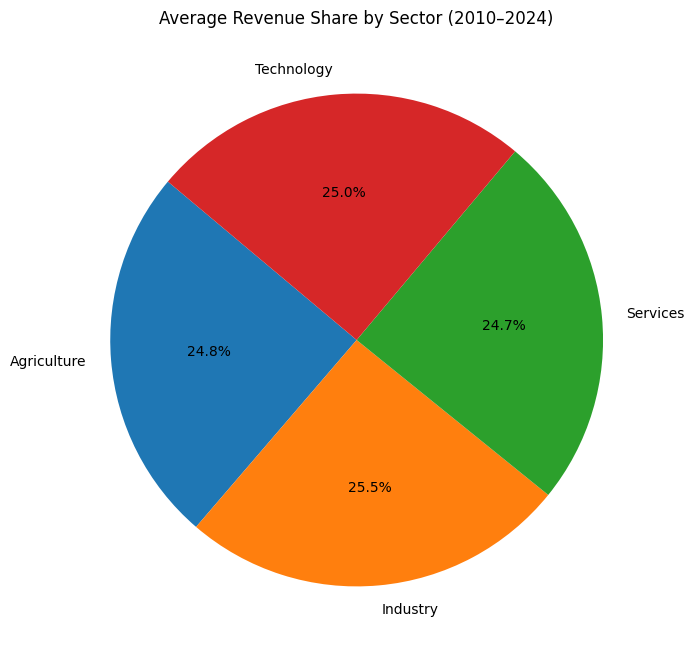

In [30]:
# Average revenue across all years by Source
df_avg = df_yearly.groupby('Source')['Revenue'].mean().reset_index()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(
    df_avg['Revenue'],
    labels=df_avg['Source'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Average Revenue Share by Sector (2010–2024)")
plt.show()
